In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
class bandit:

    def __init__(self,trueMean):
        self.trueMean = trueMean
        self.lambda_ = 1
        self.predMean = 0
        self.tau = 1
        self.count = 0
        
    def sample(self):
        return np.random.normal(self.predMean,np.sqrt(1/self.lambda_))
        #return np.random.randn() / np.sqrt(self.lambda_) + self.predMean
    def pull(self):
        return np.random.normal(self.trueMean,np.sqrt(1/self.tau))
        #return np.random.randn() / np.sqrt(self.tau) + self.trueMean
    
    def update(self,reward):
        self.count = self.count + 1
        self.predMean = (self.predMean * self.lambda_ + self.tau * reward ) / (self.lambda_ + self.tau)
        self.lambda_ += self.tau
        
        

In [3]:
############# BAYESIAN ################
def Bayesian(samples):
    arm = np.argmax(samples)    
    return arm

$ \lambda_{N+1} = \lambda_N + \tau \newline
m_{N+1} = \frac{m_N \lambda_N+\tau x_{N+1}}{\lambda_N+\tau} $

Distributions are:  [[-0.030241709909383352, 0.7071067811865476], [1.7621463721101156, 0.23570226039551584], [3.017585708500618, 0.022456322822201027]]
num of times we've selected the bandits:  [1, 17, 1982]
total reward is:  6015.53061123489
Win rate:  3.007765305617445


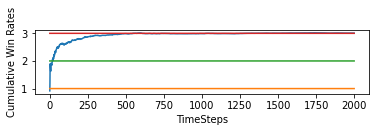

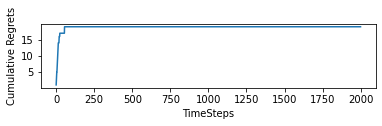

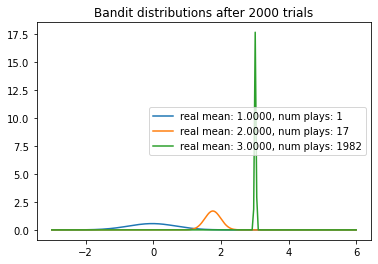

In [4]:
############ TEST CASE#################
NUM_TRIALS = 2000
banditsMeans = [1,2, 3]
rewards = np.zeros(NUM_TRIALS)
regrets = np.zeros(NUM_TRIALS)


bandits = [bandit(x) for x in banditsMeans]
optimalArm = np.argmax([b.trueMean for b in bandits])

i=0
while i < NUM_TRIALS :
    arm = Bayesian([b.sample() for b in bandits])
    curReward = bandits[arm].pull()
    bandits[arm].update(curReward)
    rewards[i] = curReward
    regrets[i] = banditsMeans[optimalArm] - banditsMeans[arm]
    i=i+1
    
    
    

print("Distributions are: " ,[[b.predMean,np.sqrt(1/b.lambda_)] for b in bandits])
#print("Best arm out of",len(bandits) ,"arm is: ", np.argmax([b.qValue for b in bandits])+1 )
print("num of times we've selected the bandits: ",[b.count for b in bandits])        
print("total reward is: ",rewards.sum())
print("Win rate: ",rewards.sum()/NUM_TRIALS)

cumulativeRewards = np.cumsum(rewards)
winRates = cumulativeRewards/(np.arange(NUM_TRIALS)+1)

plt.subplot(3,1,1)
plt.plot(winRates)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Win Rates")
for b in banditsMeans:
    plt.plot(np.ones(NUM_TRIALS)*(b))
plt.show()

regrets = np.cumsum(regrets) #cumulative rewards loss due to the need of learning
plt.subplot(3,1,2)
plt.plot(regrets)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Regrets")
plt.show()
#plt.subplot(3,1,3)
x = np.linspace(-3,6,200)
for b in bandits:
    y = norm.pdf(x,b.predMean,np.sqrt(1/b.lambda_))
    plt.plot(x,y,label=f"real mean: {b.trueMean:.4f}, num plays: {b.count}")
    plt.title(f"Bandit distributions after {NUM_TRIALS} trials")
    plt.legend()
plt.show()

